In [3]:
import tensorflow as tf
print(tf.__version__)
# from Ipython import display
from matplotlib import pyplot as plt
import random
%matplotlib inline

2.19.0


## 3.2.1 gen_dataset

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = tf.random.normal((num_examples, num_inputs),stddev = 1)
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += tf.random.normal(labels.shape,stddev=0.01)

features[0], labels[0]

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.2644544 , 0.46679878], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.1272239685058594>)

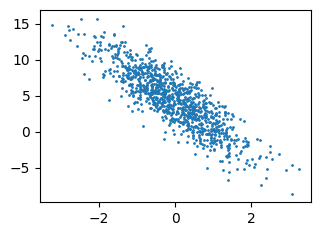

In [9]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):
#     use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1], labels, 1)

## 3.2.2 read data

In [12]:
import numpy as np
def data_iter(batch_size, features, labels):
    features = np.array(features)
    labels = np.array(labels)
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i:min(i + batch_size, num_examples)])
        yield features[j], labels[j]

In [13]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

[[ 0.31504878 -0.6649958 ]
 [ 0.04712319 -0.43772003]
 [-1.3590472   1.3867909 ]
 [-0.42755884  0.196351  ]
 [-1.0909479   0.2028802 ]
 [ 0.7773673  -0.95827806]
 [-1.4383719  -0.97021395]
 [-0.7285949  -0.93199927]
 [-2.101672   -0.05914475]
 [ 1.3518245   0.3812031 ]] [ 7.1043015   5.773345   -3.2217329   2.6677883   1.3239237   9.012645
  4.626374    5.9133115   0.20416364  5.606626  ]


## 3.2.3 initialize weight

In [14]:
w = tf.Variable(tf.random.normal((num_inputs, 1), stddev=0.01))
b = tf.Variable(tf.zeros((1,)))

## 3.2.4 define model

In [15]:
def linreg(X, w, b):
    return tf.matmul(X, w) + b

## 3.2.5 define loss

In [16]:
def squared_loss(y_hat, y):
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 /2

## 3.2.6 define optimization

In [17]:
def sgd(params, lr, batch_size):
    for param in params:
#         param[:] = param - lr * t.gradient(l, param) / batch_size
        param.assign_sub(lr * t.gradient(l, param) / batch_size)

## 3.2.7 training

In [18]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape(persistent=True) as t:
            t.watch([w,b])
            l = loss(net(X, w, b), y)
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, tf.reduce_mean(train_l)))

epoch 1, loss 0.026248
epoch 2, loss 0.000083
epoch 3, loss 0.000046


In [19]:
true_w, w

([2, -3.4],
 <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 1.9997529],
        [-3.4002666]], dtype=float32)>)

In [20]:
true_b, b

(4.2,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.1994953], dtype=float32)>)